<a href="https://colab.research.google.com/github/Luis-Hauck/Remuneracao_Jaragua_do_Sul_Junho-2024/blob/main/Remuneracao_Jaragua_do_Sul_Junho_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importações
import pandas as pd
import matplotlib.pyplot as plt

#Criando nosso relatorio





In [ ]:
#Criamos nosso dataframe
df = pd.read_excel('/content/drive/MyDrive/dados_junho.xlsx')

In [ ]:
pd.set_option('display.precision', 2)  # Define a precisão decimal mínima para 2 casas decimais
pd.set_option('display.float_format', '{:f}'.format)  # Define o formato de ponto flutuante como '%.2f'

In [ ]:
df.head()

,Entidade,Competência,Cargo,Vinculo_empregaticio,Orgao,Classificacao_cargo,Organograma,Remuneracao_bruta,Remuneracao_liquida,Efetivo_cargo_comissionado
0,MUNICIPIO DE JARAGUA DO SUL,2024-06-01,SECRETARIO MUNICIPAL - CC 1,Efetivo,Secretaria Municipal de Saúde - SEMSA,Comissionado,Secretaria Municipal de Saúde,73725.150000,42966.450000,Sim
1,MUNICIPIO DE JARAGUA DO SUL,2024-06-01,MEDICO,Efetivo,Secretaria Municipal de Saúde - SEMSA,Efetivo,Gerencia de Gestão Estratégica e Politicas Pú...,65441.010000,46250.170000,Não
2,MUNICIPIO DE JARAGUA DO SUL,2024-06-01,MEDICO,Efetivo,Secretaria Municipal de Saúde - SEMSA,Efetivo,COVID,56324.180000,43763.870000,Não
3,MUNICIPIO DE JARAGUA DO SUL,2024-06-01,MEDICO,Efetivo,Secretaria Municipal de Saúde - SEMSA,Efetivo,COVID,54144.810000,42096.830000,Não
4,MUNICIPIO DE JARAGUA DO SUL,2024-06-01,MEDICO,Efetivo,Secretaria Municipal de Saúde - SEMSA,Efetivo,Gerencia de Atenção Especializada,53422.090000,41256.200000,Não


#Explorando os dados

In [ ]:
#verificamos a estrutura do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4739 entries, 0 to 4738
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Entidade                    4739 non-null   object        
 1   Competência                 4739 non-null   datetime64[ns]
 2   Cargo                       4739 non-null   object        
 3   Vinculo_empregaticio        4739 non-null   object        
 4   Orgao                       4739 non-null   object        
 5   Classificacao_cargo         4739 non-null   object        
 6   Organograma                 4739 non-null   object        
 7   Remuneracao_bruta           4739 non-null   float64       
 8   Remuneracao_liquida         4739 non-null   float64       
 9   Efetivo_cargo_comissionado  4739 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 370.4+ KB


In [ ]:
#Convertendo em string e tirando espaços em branco
df['Entidade'] = df['Entidade'].astype(str).str.strip()
df['Cargo'] = df['Cargo'].astype(str).str.strip()
df['Vinculo_empregaticio'] = df['Vinculo_empregaticio'].astype(str).str.strip()
df['Orgao'] = df['Orgao'].astype(str).str.strip()
df['Classificacao_cargo'] = df['Classificacao_cargo'].astype(str).str.strip()
df['Organograma'] = df['Organograma'].astype(str).str.strip()
df['Efetivo_cargo_comissionado'] = df['Efetivo_cargo_comissionado'].astype(str).str.strip()

In [ ]:
#Analisamos alguns dados estatísticos
df['Remuneracao_bruta'].describe()

,Remuneracao_bruta
count,4739.000000
mean,7325.869196
std,5994.044562
min,0.000000
25%,3652.495000
50%,5937.040000
75%,8968.210000
max,73725.150000


<Axes: >

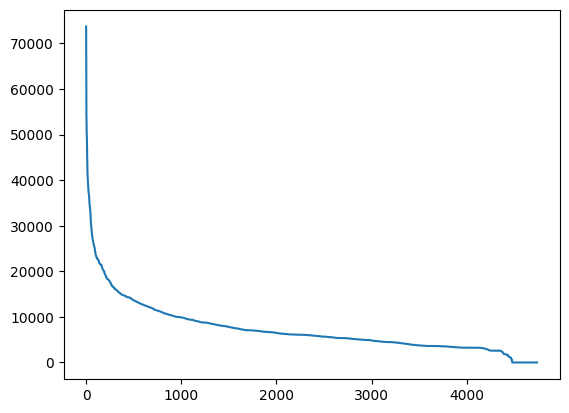

In [ ]:
#Análisamos a nossa principal váriavel
df['Remuneracao_bruta'].plot()

# Os cargos comissionados representa quantos % da remuneração total?

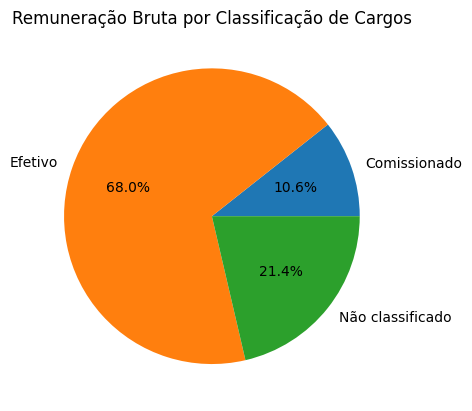

In [ ]:
#Agrupa a remuneracao bruta por car cassificação de cargos
class_cargos = df.groupby('Classificacao_cargo')['Remuneracao_bruta'].sum()
plt.pie(class_cargos, labels=class_cargos.index, autopct='%1.1f%%')
plt.title('Remuneração Bruta por Classificação de Cargos')
plt.show()

#Qual a diferença da remuneração média entre cargos comissionados e efetivos?

In [ ]:
# Calculando a média salarial líquida por classificação de cargo
media_comissionados = df[df["Classificacao_cargo"] == "Comissionado"]["Remuneracao_bruta"].mean()
media_efetivos = df[df["Classificacao_cargo"] == "Efetivo"]["Remuneracao_bruta"].mean()

# Calculando a diferença
diferenca = media_comissionados - media_efetivos

# Apresentando os resultados
print(f"Média Remuneracao bruta de cargos comissionados: R$ {media_comissionados:.2f}")
print(f"Média Remuneracao bruta de cargos efetivos: R$ {media_efetivos:.2f}")
print(f"Diferença Remuneracao brutaa: R$ {diferenca:.2f}")
print(f'Difença Remuneracao bruta {round(diferenca/media_comissionados*100)}%')

Média Remuneracao bruta de cargos comissionados: R$ 13200.93
Média Remuneracao bruta de cargos efetivos: R$ 8996.97
Diferença Remuneracao brutaa: R$ 4203.96
Difença Remuneracao bruta 32%


In [ ]:
cargos_comissionados = df[df["Classificacao_cargo"] == "Comissionado"]
cargos_comissionados.describe()

,Competência,Remuneracao_bruta,Remuneracao_liquida
count,280,280.000000,280.000000
mean,2024-06-01 00:00:00,13200.930286,10373.734286
min,2024-06-01 00:00:00,3849.380000,3264.990000
25%,2024-06-01 00:00:00,8015.305000,6272.725000
50%,2024-06-01 00:00:00,10418.110000,8550.250000
75%,2024-06-01 00:00:00,16048.820000,13314.535000
max,2024-06-01 00:00:00,73725.150000,42966.450000
std,NaN,7791.707315,5905.143937


In [ ]:
cargos_efetivos = df[df["Classificacao_cargo"] == "Efetivo"]
cargos_efetivos.describe()

,Competência,Remuneracao_bruta,Remuneracao_liquida
count,2624,2624.000000,2624.000000
mean,2024-06-01 00:00:00,8996.967008,7339.838693
min,2024-06-01 00:00:00,0.000000,0.000000
25%,2024-06-01 00:00:00,4999.980000,4196.350000
50%,2024-06-01 00:00:00,7340.935000,6053.180000
75%,2024-06-01 00:00:00,10910.707500,8955.725000
max,2024-06-01 00:00:00,65441.010000,46250.170000
std,NaN,6231.642433,4805.100028


#Quais os cargos mais ocupados?

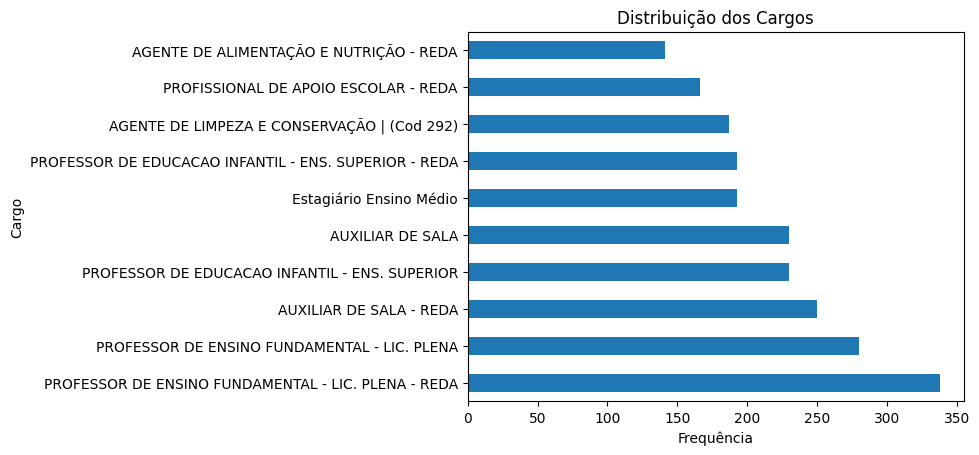

In [ ]:
#Devemos notar que também grande parte dos cargos são de professores
contagem_cargos = df['Cargo'].value_counts().sort_values(ascending=False).head(10)
contagem_cargos
# Criar o gráfico de barras
contagem_cargos.plot(kind='barh')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição dos Cargos')
plt.xlabel('Frequência')
plt.ylabel('Cargo')

# Mostrar o gráfico
plt.show()

#Quais as a entidade com maior média de remuneração bruta? E qual teve o maior gasto com remuneração?


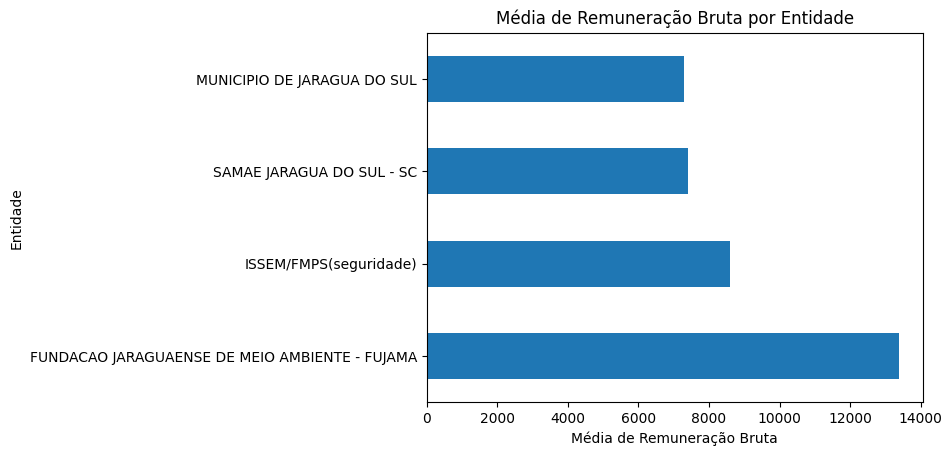

In [ ]:
# Maiores salarios médios por entidades
maiores_entidades = df.groupby('Entidade')['Remuneracao_bruta'].mean().sort_values(ascending=False).head(5)
maiores_entidades.plot(kind='barh')
plt.title('Média de Remuneração Bruta por Entidade')
plt.xlabel('Média de Remuneração Bruta')
plt.ylabel('Entidade')
plt.show()

In [ ]:

#entidades com maior gasto em remuneração
maiores_entidades = df.groupby('Entidade')['Remuneracao_bruta'].sum().sort_values(ascending=False).head(5)
maiores_entidades


,Remuneracao_bruta
Entidade,
MUNICIPIO DE JARAGUA DO SUL,32436815.310000
SAMAE JARAGUA DO SUL - SC,2017604.690000
FUNDACAO JARAGUAENSE DE MEIO AMBIENTE - FUJAMA,254286.260000
ISSEM/FMPS(seguridade),8587.860000


In [ ]:
fujama = df[df['Entidade'] == 'FUNDACAO JARAGUAENSE DE MEIO AMBIENTE - FUJAMA']
fujama.describe()

,Competência,Remuneracao_bruta,Remuneracao_liquida
count,19,19.000000,19.000000
mean,2024-06-01 00:00:00,13383.487368,10625.503158
min,2024-06-01 00:00:00,3725.960000,3229.860000
25%,2024-06-01 00:00:00,8378.480000,7118.990000
50%,2024-06-01 00:00:00,10337.070000,7835.730000
75%,2024-06-01 00:00:00,17853.625000,12711.000000
max,2024-06-01 00:00:00,32640.070000,25508.170000
std,NaN,7417.626164,5712.212058
